In [1]:
import os
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from python.manipulate_prediction_result import load_and_filter_prediction_data
from python.plot_epc import plot_count_zero
from python.plot_epc import wrap_cfs_pr_plot

# Suppress specific warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, fbeta_score

In [2]:
# Parameter setting
cage_type = 'repSub'
models = ['GM12878-model', 'GM12878_wt10M-model']
samples = ['C1', 'C2', 'C3', 'N4', 'N5', 'N6', '10M_N1', '10M_N2', '10M_N3', 'groCap_1', 'ProCap_pcr_2']

directory = '../data/results/epc_' + cage_type + '_profile/predictions/'
pattern_pos = 'epc_' + cage_type + 'K562-on-{model}_pred_all_profiles_subtnorm_pos_EPC_pos_K562_{sample}.bed'
pattern_neg = 'epc_' + cage_type + 'K562-on-{model}_pred_all_profiles_subtnorm_neg_EPC_neg_K562_{sample}.bed'

colors = {'C':"#FE8D02", 'C1':"#FE8D02", 'C2':"#FE8D02", 'C3':"#FE8D02", 
          'N':"#FF4425", 'N4':"#FF4425", 'N5':"#FF4425", 'N6':"#FF4425",
          '10M_N1':"#7D62CF", '10M_N2':"#7D62CF", '10M_N3':"#7D62CF", '10M_N':"#7D62CF",
          'groCap_1':"#3D4138", 'ProCap_pcr_2':"#878784"}

In [3]:
# Process the files and get the dataframes
pos_df_scores, pos_df_sum_counts = load_and_filter_prediction_data(directory+'pos/', models, samples, pattern_pos, y_true=1)
neg_df_scores, neg_df_sum_counts = load_and_filter_prediction_data(directory+'neg/', models, samples, pattern_neg, y_true=0)

Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to NaN where 'sum_count' = 0.
Filtering: Setting 'score' to N

In [4]:
P = len(pos_df_sum_counts[models[0]])
N = len(neg_df_sum_counts[models[0]])

/Users/natsudanav/Desktop/zmk214workingspace/evaluation_epcrispr_benchmark/python/plot_epc.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
/Users/natsudanav/Desktop/zmk214workingspace/evaluation_epcrispr_benchmark/python/plot_epc.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")


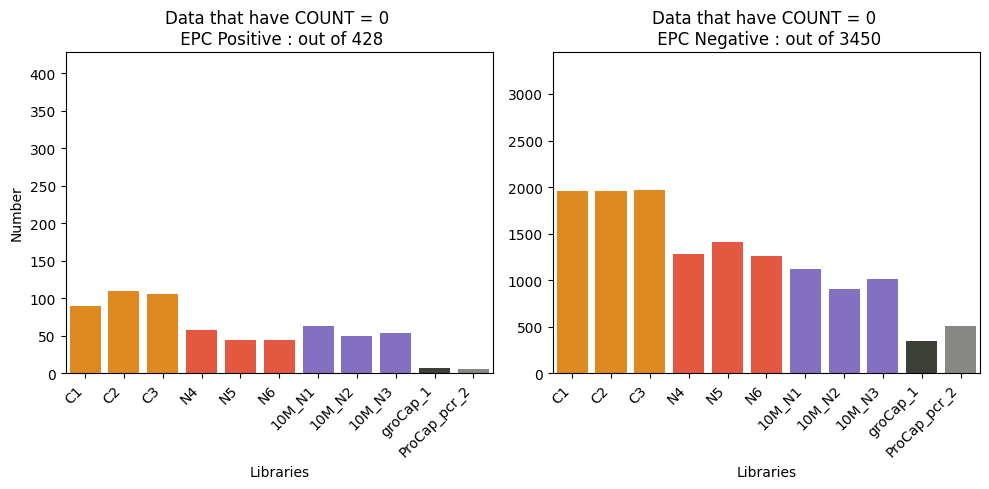

In [5]:
model = models[0] # Doesn't matter which model you choose
plot_count_zero(pos_df_sum_counts, neg_df_sum_counts, model, samples, colors, P, N, 'plot_count0_'+cage_type+'.pdf')

In [6]:
models[0]

'GM12878-model'

In [7]:
model = models[0]
model_pos_df_scores = pos_df_scores[model][samples]
model_neg_df_scores = neg_df_scores[model][samples]

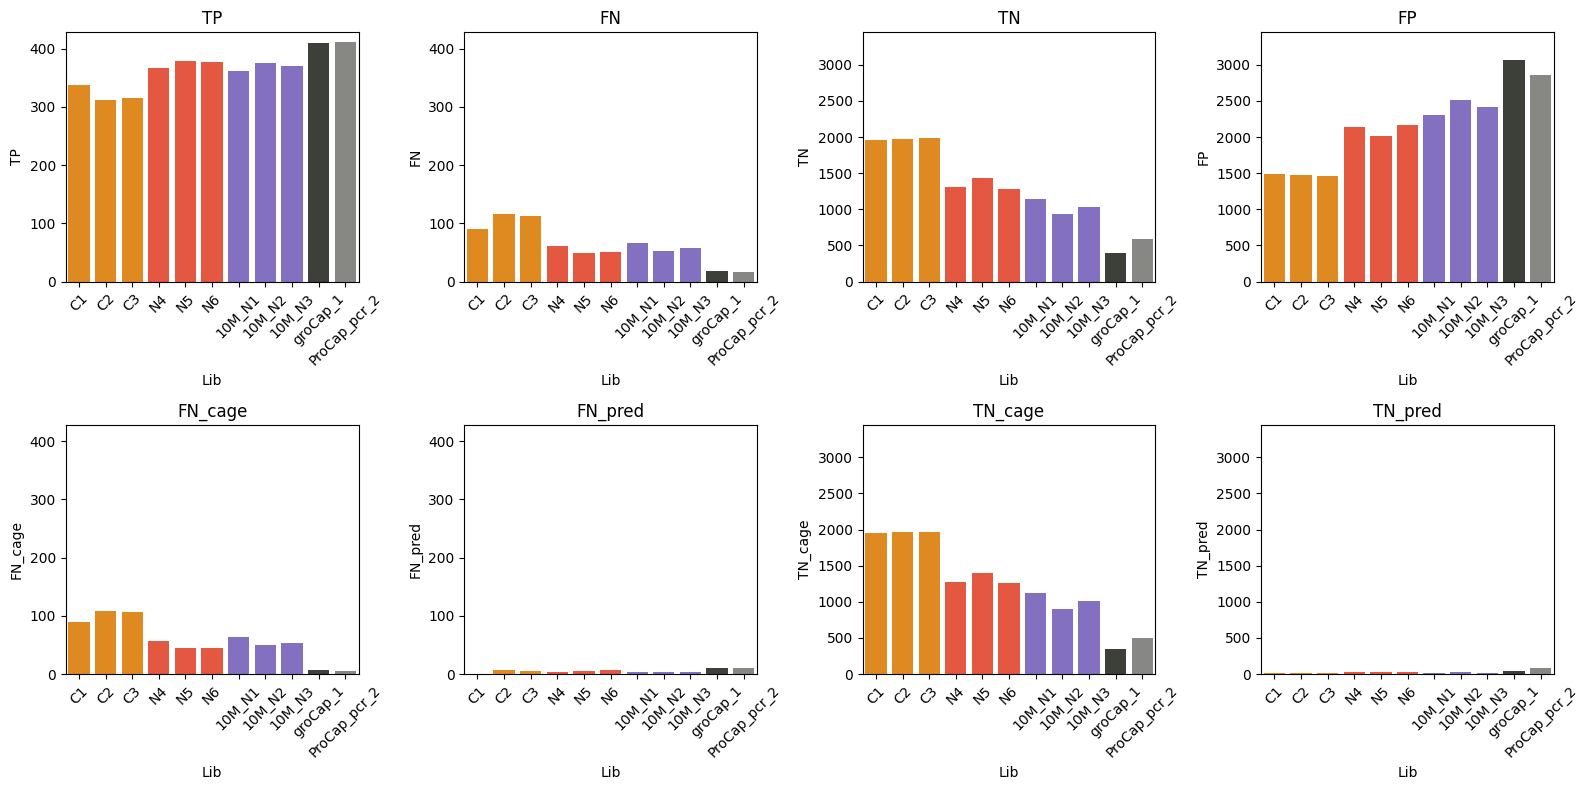

In [8]:
cfs_yproba_030, pr_yproba_030 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.3, P, N, colors, save='plot_cfs_030_'+cage_type+'_'+model)

In [9]:
pr_yproba_030.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.184962,0.174107,0.177130,0.146157,0.158312,0.148017,0.135257,0.129534,0.132521,0.118122,0.125725
recall,0.787383,0.728972,0.738318,0.857477,0.885514,0.880841,0.843458,0.876168,0.864486,0.957944,0.962617


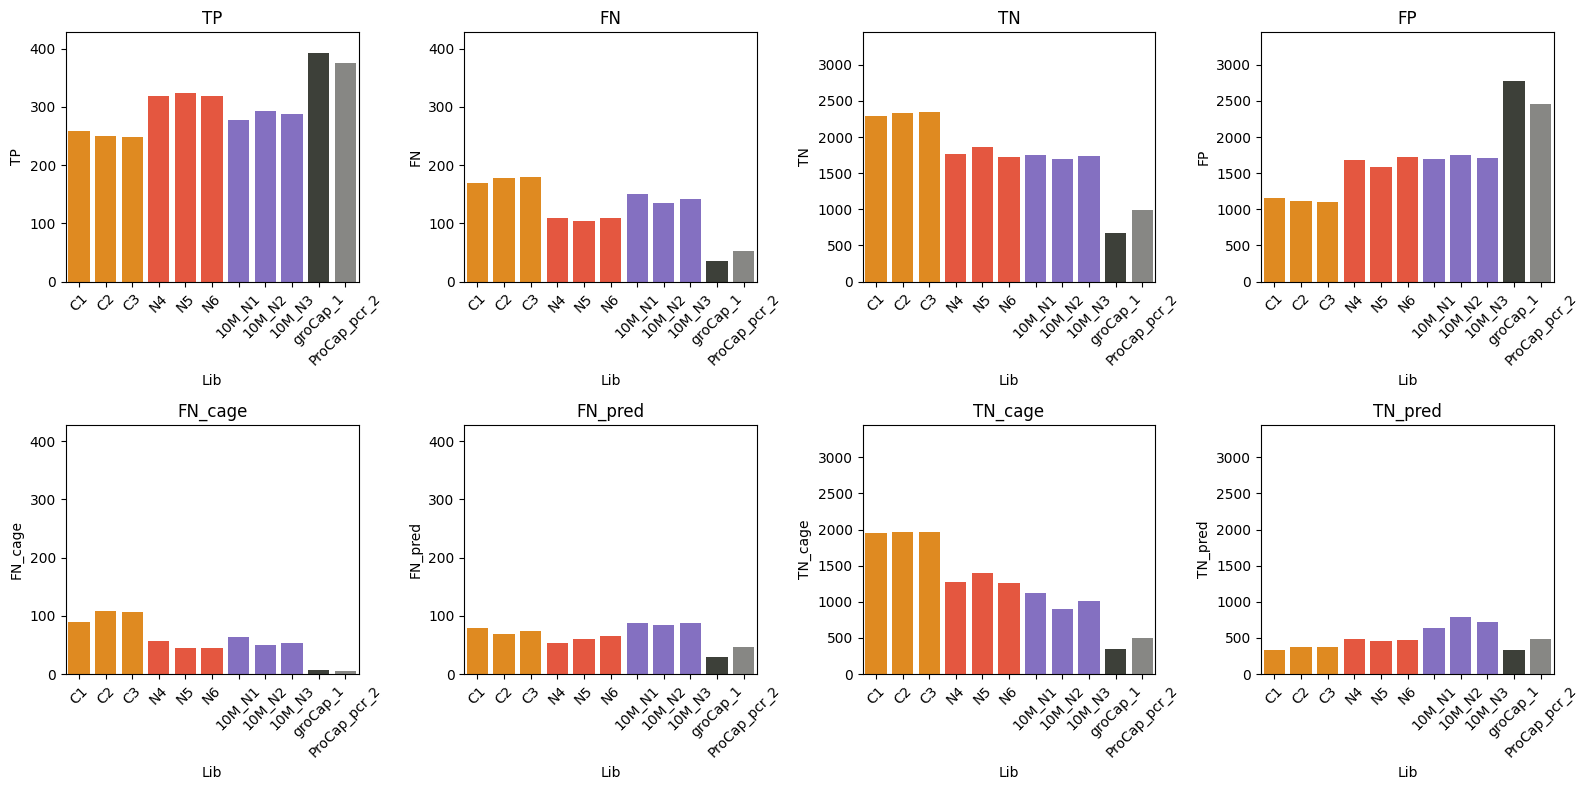

In [10]:
cfs_yproba_050, pr_yproba_050 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.5, P, N, colors, save='plot_cfs_050_'+cage_type+'_'+model)

In [11]:
pr_yproba_050.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.18291,0.182615,0.184113,0.159080,0.169811,0.156526,0.140609,0.142857,0.143285,0.123581,0.132228
recall,0.60514,0.584112,0.579439,0.742991,0.757009,0.745327,0.647196,0.684579,0.670561,0.915888,0.876168


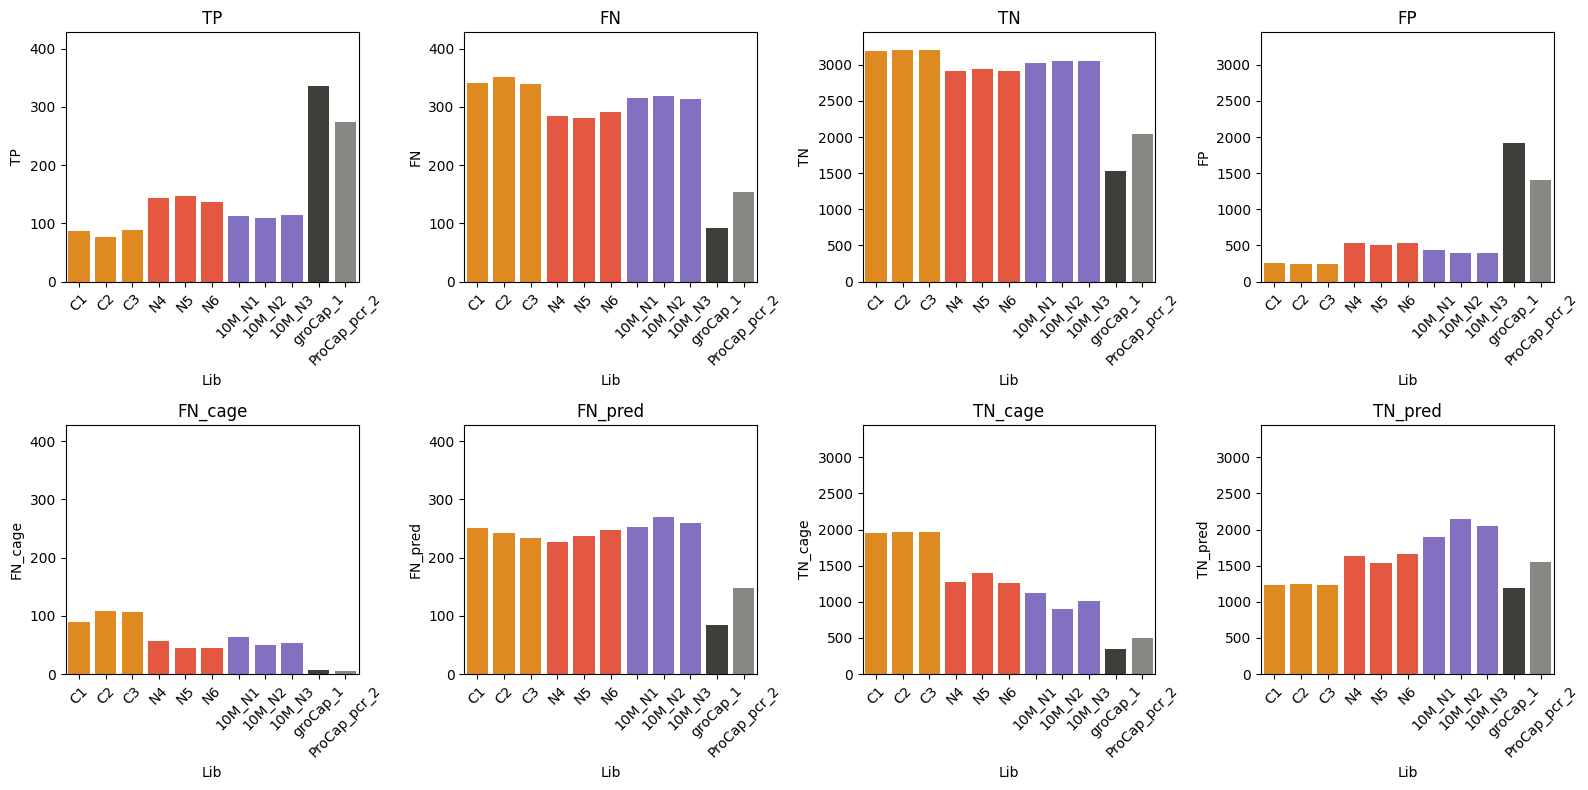

In [12]:
cfs_yproba_070, pr_yproba_070 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.7, P, N, colors, save='plot_cfs_070_'+cage_type+'_'+model)

In [13]:
pr_yproba_070.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.248571,0.235294,0.264881,0.213018,0.226154,0.203869,0.206262,0.213307,0.226824,0.149002,0.163582
recall,0.203271,0.177570,0.207944,0.336449,0.343458,0.320093,0.261682,0.254673,0.268692,0.785047,0.640187


In [14]:
models[1]

'GM12878_wt10M-model'

In [15]:
model = models[1]
model_pos_df_scores = pos_df_scores[model][samples]
model_neg_df_scores = neg_df_scores[model][samples]

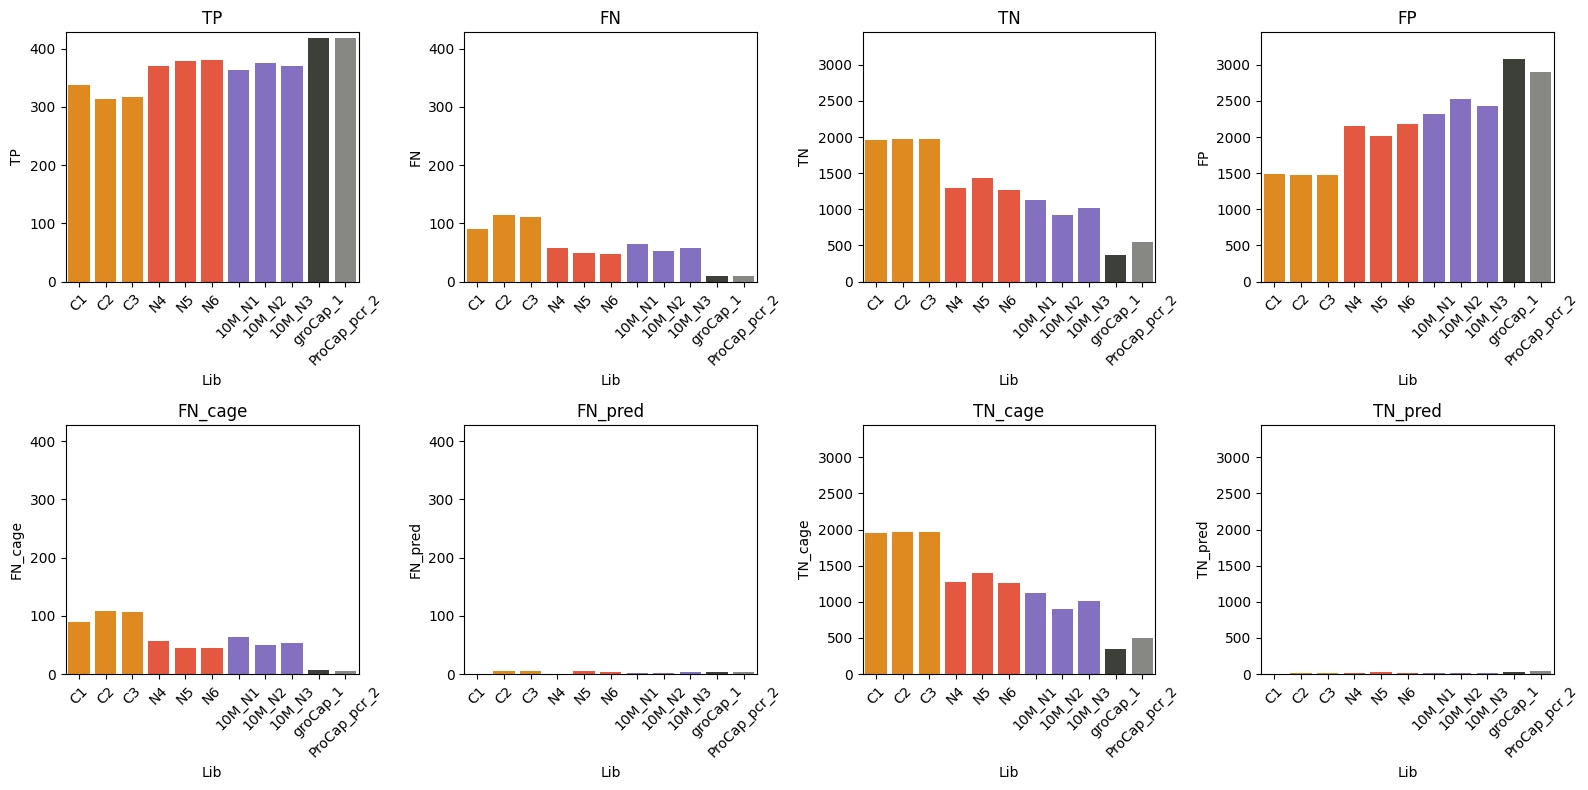

In [16]:
cfs_yproba_030, pr_yproba_030 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.3, P, N, colors, save='plot_cfs_030_'+cage_type+'_'+model)

In [17]:
pr_yproba_030.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.185003,0.175028,0.177392,0.146884,0.157851,0.14838,0.135600,0.129477,0.132453,0.119531,0.126129
recall,0.789720,0.733645,0.740654,0.864486,0.885514,0.88785,0.848131,0.878505,0.866822,0.976636,0.978972


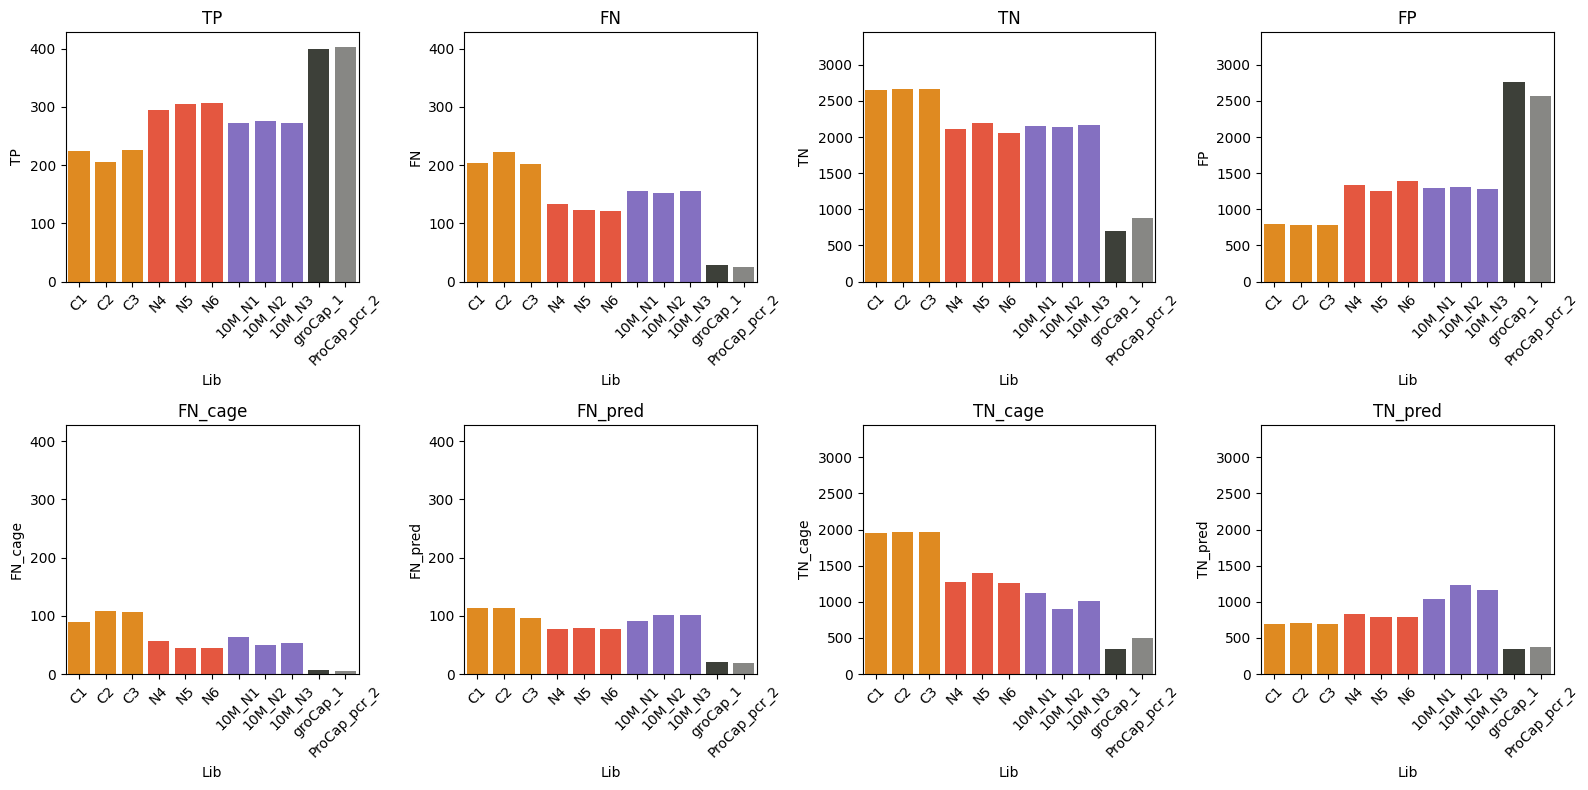

In [18]:
cfs_yproba_050, pr_yproba_050 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.5, P, N, colors, save='plot_cfs_050_'+cage_type+'_'+model)

In [19]:
pr_yproba_050.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.218324,0.207700,0.222660,0.180590,0.196141,0.180164,0.174664,0.174023,0.176129,0.126743,0.135782
recall,0.523364,0.478972,0.528037,0.686916,0.712617,0.717290,0.637850,0.644860,0.637850,0.934579,0.941589


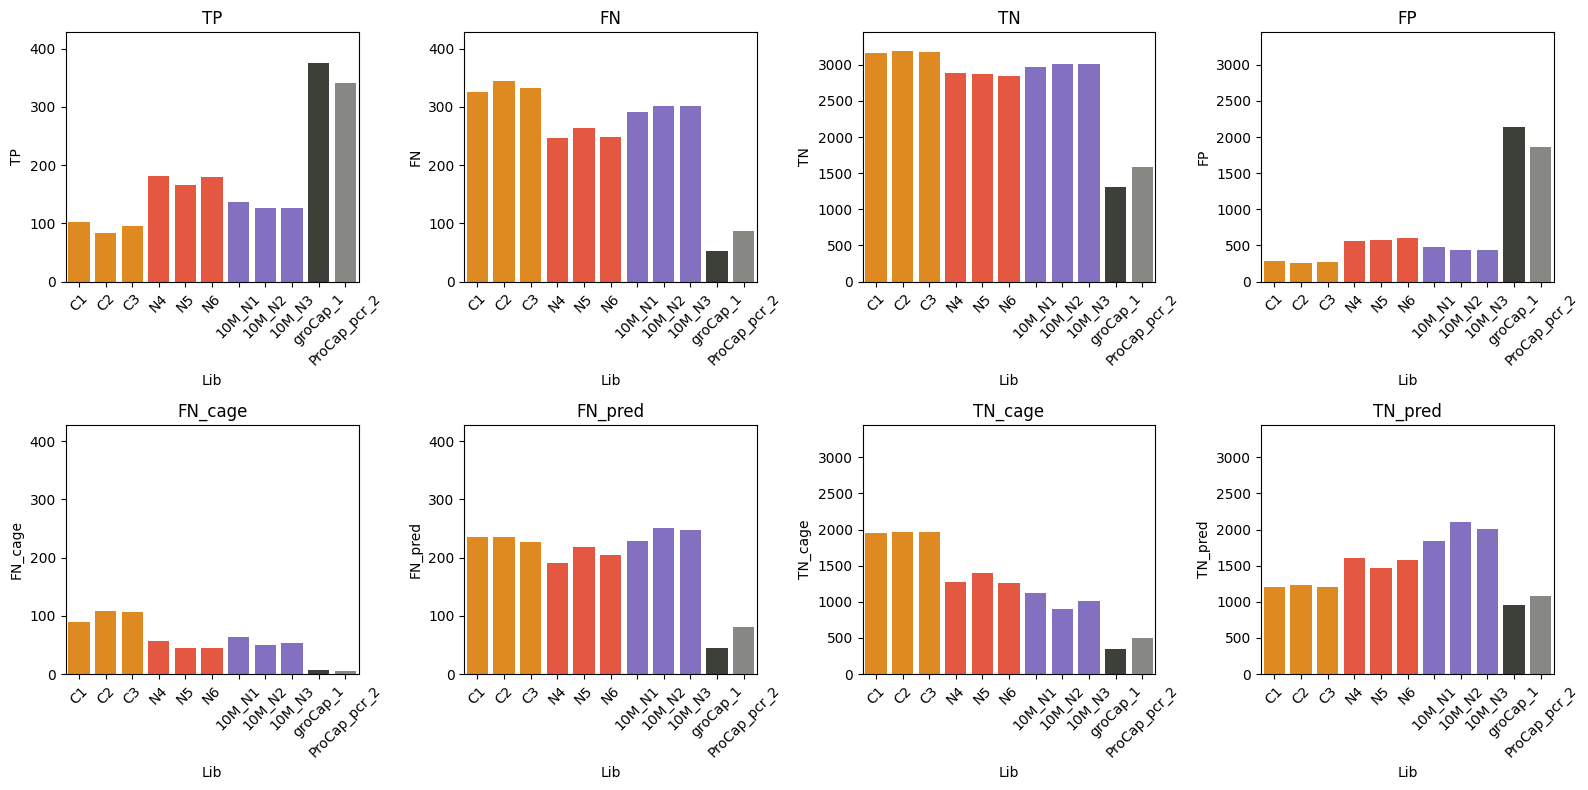

In [20]:
cfs_yproba_070, pr_yproba_070 = wrap_cfs_pr_plot(model_pos_df_scores, model_neg_df_scores, 0.7, P, N, colors, save='plot_cfs_070_'+cage_type+'_'+model)

In [21]:
pr_yproba_070.transpose()

,C1,C2,C3,N4,N5,N6,10M_N1,10M_N2,10M_N3,groCap_1,ProCap_pcr_2
precision,0.264781,0.250000,0.258152,0.242303,0.222672,0.227446,0.221325,0.225979,0.225979,0.149147,0.154719
recall,0.240654,0.196262,0.221963,0.422897,0.385514,0.418224,0.320093,0.296729,0.296729,0.878505,0.796729


In [22]:
#### ROC AND AUCROC ###

In [23]:
def plot_roc_df(y_true, y_proba, samples, model, colors, save=False):
    plt.figure(figsize=(10, 5))
    y_proba = y_proba.fillna(0)  # Replace NaN values with 0

    for i in samples:
        fpr, tpr, _ = roc_curve(y_true, y_proba[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{i} (AUC = {roc_auc:.2f})', color=colors.get(i, 'blue'))
        
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model+' ROC Curve')
    plt.legend()
    if save:
        plt.savefig(save + '.pdf')
    plt.show()


In [24]:
# Plot PR Curve
def plot_pr_curve(y_true, y_proba, samples, model, colors, save=False):
    plt.figure(figsize=(10, 5))
    y_proba = y_proba.fillna(0)  # Replace NaN values with 0

    for i in samples:
        precision, recall, _ = precision_recall_curve(y_true, y_proba[i])
        average_precision = average_precision_score(y_true, y_proba[i])
        plt.plot(recall, precision, label=f'{i} (AP = {average_precision:.2f})', color=colors.get(i, 'blue'))
        
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model} Precision-Recall Curve')
    plt.legend()
    if save:
        plt.savefig(save + '.pdf')
    plt.show()


'''
def plot_pr_df(y_true, yproba, samples, save=False):
    plt.figure(figsize=(10, 5))
    
    for i in samples:
        precision, recall, _ = precision_recall_curve(y_true, yproba[i])
        #print(precision)
        #print(recall)
        area_under_curve = auc(recall, precision)
        #print(area_under_curve)
        plt.plot(recall, precision, label=f'{i} (AUC = {area_under_curve:.2f})', color=colors[i])
        #avg_precision = average_precision_score(y_true, yproba[i])
        #plt.plot(recall, precision, label=f'{i} (AP = {avg_precision:.2f})', color=colors[i])
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    if save != False:
        plt.savefig(save + '.pdf')
    plt.show()
'''

"\ndef plot_pr_df(y_true, yproba, samples, save=False):\n    plt.figure(figsize=(10, 5))\n    \n    for i in samples:\n        precision, recall, _ = precision_recall_curve(y_true, yproba[i])\n        #print(precision)\n        #print(recall)\n        area_under_curve = auc(recall, precision)\n        #print(area_under_curve)\n        plt.plot(recall, precision, label=f'{i} (AUC = {area_under_curve:.2f})', color=colors[i])\n        #avg_precision = average_precision_score(y_true, yproba[i])\n        #plt.plot(recall, precision, label=f'{i} (AP = {avg_precision:.2f})', color=colors[i])\n    \n    plt.xlabel('Recall')\n    plt.ylabel('Precision')\n    plt.title('Precision-Recall Curve')\n    plt.legend()\n    if save != False:\n        plt.savefig(save + '.pdf')\n    plt.show()\n"

In [25]:
models[0]

'GM12878-model'

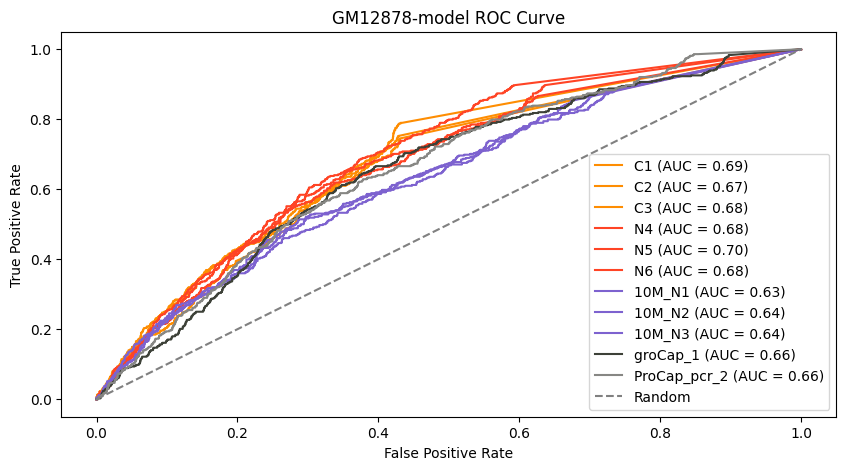

In [26]:
model = models[0]
model_pos_df_scores = pos_df_scores[model]
model_neg_df_scores = neg_df_scores[model]

combined_df = pd.concat([model_pos_df_scores, model_neg_df_scores])
combined_df = combined_df.reset_index(drop=True)

y_true = combined_df["y_true"]
y_proba = combined_df[samples]

plot_roc_df(y_true, y_proba, samples, model, colors, save='plot_roc_'+cage_type+'_'+model)

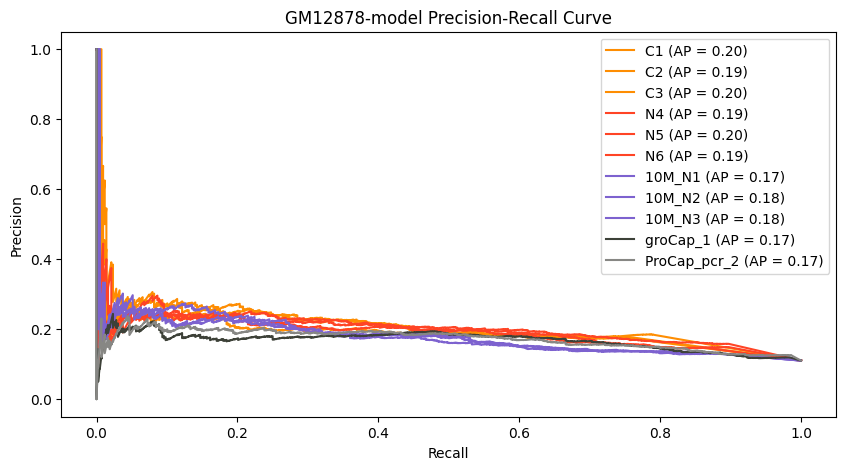

In [27]:
plot_pr_curve(y_true, y_proba, samples, model, colors, save='plot_pr_'+cage_type+'_'+model)

In [28]:
models[1]

'GM12878_wt10M-model'

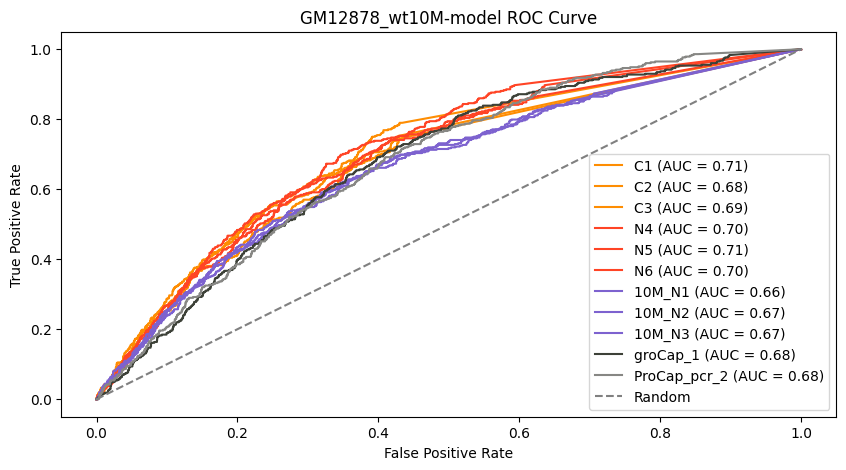

In [29]:
model = models[1]
model_pos_df_scores = pos_df_scores[model]
model_neg_df_scores = neg_df_scores[model]

combined_df = pd.concat([model_pos_df_scores, model_neg_df_scores])
combined_df = combined_df.reset_index(drop=True)

y_true = combined_df["y_true"]
y_proba = combined_df[samples]

plot_roc_df(y_true, y_proba, samples, model, colors, save='plot_roc_'+cage_type+'_'+model)

In [30]:
#### PR CURVE AND AUCPR ####

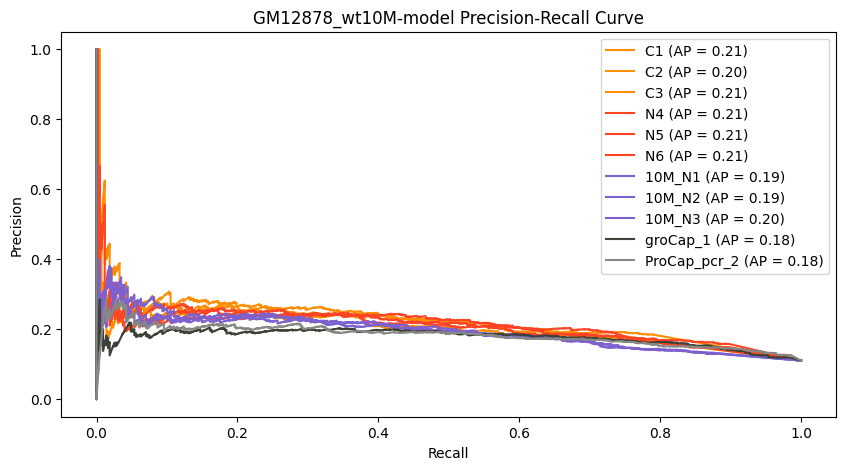

In [31]:
plot_pr_curve(y_true, y_proba, samples, model, colors, save='plot_pr_'+cage_type+'_'+model)